In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/5048/868335/compressed/imgs.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1594412235&Signature=g33bCcj%2FAqQfVL69Tz6VGG9AP5oLwePb%2F4YvTJ2vXXtiDBAt69UWyjubwpO9iZ5U42qEKE6B614IqS91fCKKfDgzvL0Gj6j5qIjPuuKiAOA1butcTdLbD1FLrUqLrXEc0nJWamhCsiVSl87QTXbXxLn6w78OC05sAVTLVUfSg1t4gQr9O1geA9oMh%2Fhy1%2BIGku5pUlBb5%2FReDMvxTTlzTOn71Q%2F3IU2S1a4BzZ7Fy7qF%2B8o1H7xBPbp3PEZ22Qo1YyQ9qwUaeY2ZgZkJ8M5fGM%2Bezgtu91I7uiX4lWQcwZa64R4JmmwTRj0ViMi09CMp1y4rx5dH%2B9IBo93d7P0KbQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dimgs.zip" -c -O 'imgs.zip'


--2020-07-07 20:20:47--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/5048/868335/compressed/imgs.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1594412235&Signature=g33bCcj%2FAqQfVL69Tz6VGG9AP5oLwePb%2F4YvTJ2vXXtiDBAt69UWyjubwpO9iZ5U42qEKE6B614IqS91fCKKfDgzvL0Gj6j5qIjPuuKiAOA1butcTdLbD1FLrUqLrXEc0nJWamhCsiVSl87QTXbXxLn6w78OC05sAVTLVUfSg1t4gQr9O1geA9oMh%2Fhy1%2BIGku5pUlBb5%2FReDMvxTTlzTOn71Q%2F3IU2S1a4BzZ7Fy7qF%2B8o1H7xBPbp3PEZ22Qo1YyQ9qwUaeY2ZgZkJ8M5fGM%2Bezgtu91I7uiX4lWQcwZa64R4JmmwTRj0ViMi09CMp1y4rx5dH%2B9IBo93d7P0KbQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dimgs.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4294708651 (4.0G) [application/zip]
Saving to: ‘imgs.zip’

imgs.zip            100%[==========

In [ ]:
!unzip  imgs.zip -d /content/DDD


In [ ]:
import pandas as pd
import os
import random
import math
import numpy as np
from PIL import Image
import time
from joblib import Parallel,delayed
import glob
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from shutil import copyfile


In [ ]:
path = os.path.join(os.getcwd(), 'DDD/')
images_path = os.path.join(path, 'train/')

In [ ]:
for i in range(10):
  print('Images in class c{}:'.format(i))
  print(len(os.listdir(images_path + 'c' + str(i) +'/')))

Images in class c0:
2489
Images in class c1:
2267
Images in class c2:
2317
Images in class c3:
2346
Images in class c4:
2326
Images in class c5:
2312
Images in class c6:
2325
Images in class c7:
2002
Images in class c8:
1911
Images in class c9:
2129


In [ ]:
os.mkdir('/content/DDD1/')
os.mkdir('/content/DDD1/train')
os.mkdir('/content/DDD1/val')
for i in range(10):
  os.mkdir('/content/DDD1/train/' + 'c' + str(i))
  os.mkdir('/content/DDD1/val/' + 'c' + str(i))
  
# os.mkdir('/content/DDD/test')

In [ ]:
for i in range(10):
  path_to_image = images_path + 'c' + str(i)
  split = int(len(os.listdir(path_to_image))*0.8)
  random.sample(os.listdir(path_to_image), len(os.listdir(path_to_image)))
  for train_set in os.listdir(path_to_image)[:split]:
    ini_path = path_to_image + '/' + train_set 
    fin_path = '/content/DDD1/train/' + 'c' + str(i) + '/' + train_set 
    if(os.path.getsize(ini_path)>0):
      copyfile(ini_path, fin_path)
      
  for val_set in os.listdir(path_to_image)[split:]:
    ini_path = path_to_image + '/' + val_set
    fin_path = '/content/DDD1/val/' + 'c' + str(i) + '/' + val_set
    if(os.path.getsize(ini_path)>0):
      copyfile(ini_path, fin_path)


In [ ]:
print(len(os.listdir('/content/DDD1/val/c0')))
len(os.listdir('/content/DDD1/train/c0'))

498


1991

In [ ]:
train_dir = '/content/DDD1/train'
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.,
                                                            rotation_range = 40,
                                                            width_shift_range = 0.2,
                                                            height_shift_range = 0.2,
                                                            shear_range=0.2,
                                                            horizontal_flip=True,
                                                            fill_mode='nearest'
                                                            )
val_dir = '/content/DDD1/val/'
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)

In [ ]:
pre_trained_model = tf.keras.applications.VGG16(input_shape = (224,224,3),
                                                include_top = False,
                                                weights = 'imagenet')
for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('block5_pool').output


58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
x = tf.keras.layers.Flatten()(last_layer)
x = tf.keras.layers.Dense(512, activation ='relu' )(x)
x = tf.keras.layers.Dense(10, activation = 'softmax')(x)
model = tf.keras.Model(pre_trained_model.input, x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode = 'categorical',
                                                    target_size = (224, 224)
)

validation_genrator = validation_datagen.flow_from_directory(val_dir,
                                                             batch_size=32,
                                                             class_mode = 'categorical',
                                                             target_size = (224, 224)
)


Found 17934 images belonging to 10 classes.
Found 4490 images belonging to 10 classes.


In [ ]:
history = model.fit(train_generator, validation_data = validation_genrator, epochs = 10)

Epoch 1/10
561/561 [==============================] - 307s 547ms/step - loss: 1.4287 - accuracy: 0.5141 - val_loss: 0.6999 - val_accuracy: 0.7906
Epoch 2/10
561/561 [==============================] - 305s 543ms/step - loss: 0.8461 - accuracy: 0.7210 - val_loss: 0.4951 - val_accuracy: 0.8216
Epoch 3/10
561/561 [==============================] - 307s 547ms/step - loss: 0.6534 - accuracy: 0.7833 - val_loss: 0.3103 - val_accuracy: 0.8958
Epoch 4/10
561/561 [==============================] - 307s 547ms/step - loss: 0.5485 - accuracy: 0.8160 - val_loss: 0.3377 - val_accuracy: 0.8924
Epoch 5/10
561/561 [==============================] - 306s 546ms/step - loss: 0.4950 - accuracy: 0.8372 - val_loss: 0.2964 - val_accuracy: 0.9029
Epoch 6/10
561/561 [==============================] - 306s 545ms/step - loss: 0.4613 - accuracy: 0.8479 - val_loss: 0.2030 - val_accuracy: 0.9379
Epoch 7/10
561/561 [==============================] - 306s 546ms/step - loss: 0.4374 - accuracy: 0.8581 - val_loss: 0.2460 -

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
print(type(uploaded))
for img in uploaded.keys():
  img_loc= '/content/' + img
  imag  = image.load_img(img_loc, target_size=(224, 224))
  x = image.img_to_array(imag)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size = 10)
  print(np.argmax(classes))

Saving img_11.jpg to img_11.jpg
Saving img_12.jpg to img_12.jpg
Saving img_13.jpg to img_13.jpg
Saving img_15.jpg to img_15.jpg
Saving img_17.jpg to img_17.jpg
<class 'dict'>
8
6
8
8
8


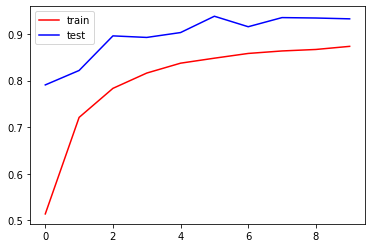

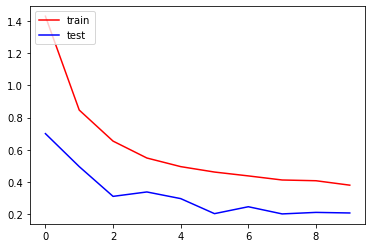

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend(['train', 'test'], loc='upper left')